In [4]:
import numpy as np
import csv
from collections import defaultdict
import json
import matplotlib.pyplot as plt


## Data Visualization

In [5]:
movies = defaultdict(dict)
genres = set()

with open('./Dataset_MovieSummaries/movie.metadata.tsv') as f:
    movie_metadata = csv.reader(f, delimiter='\t')

    # Extracting genres from the metadata
    for line in movie_metadata:
         
        values = json.loads(line[8]).values()
        values = list(values)
        genres.update(values)

        # Adding genres to the movies dictionary
        for value in values:
            if value in movies:
                movies[value] += 1
            else:
                movies[value] = 1
                
movies = dict(sorted(movies.items(), key=lambda item: item[1]))

In [6]:
len(genres)

363

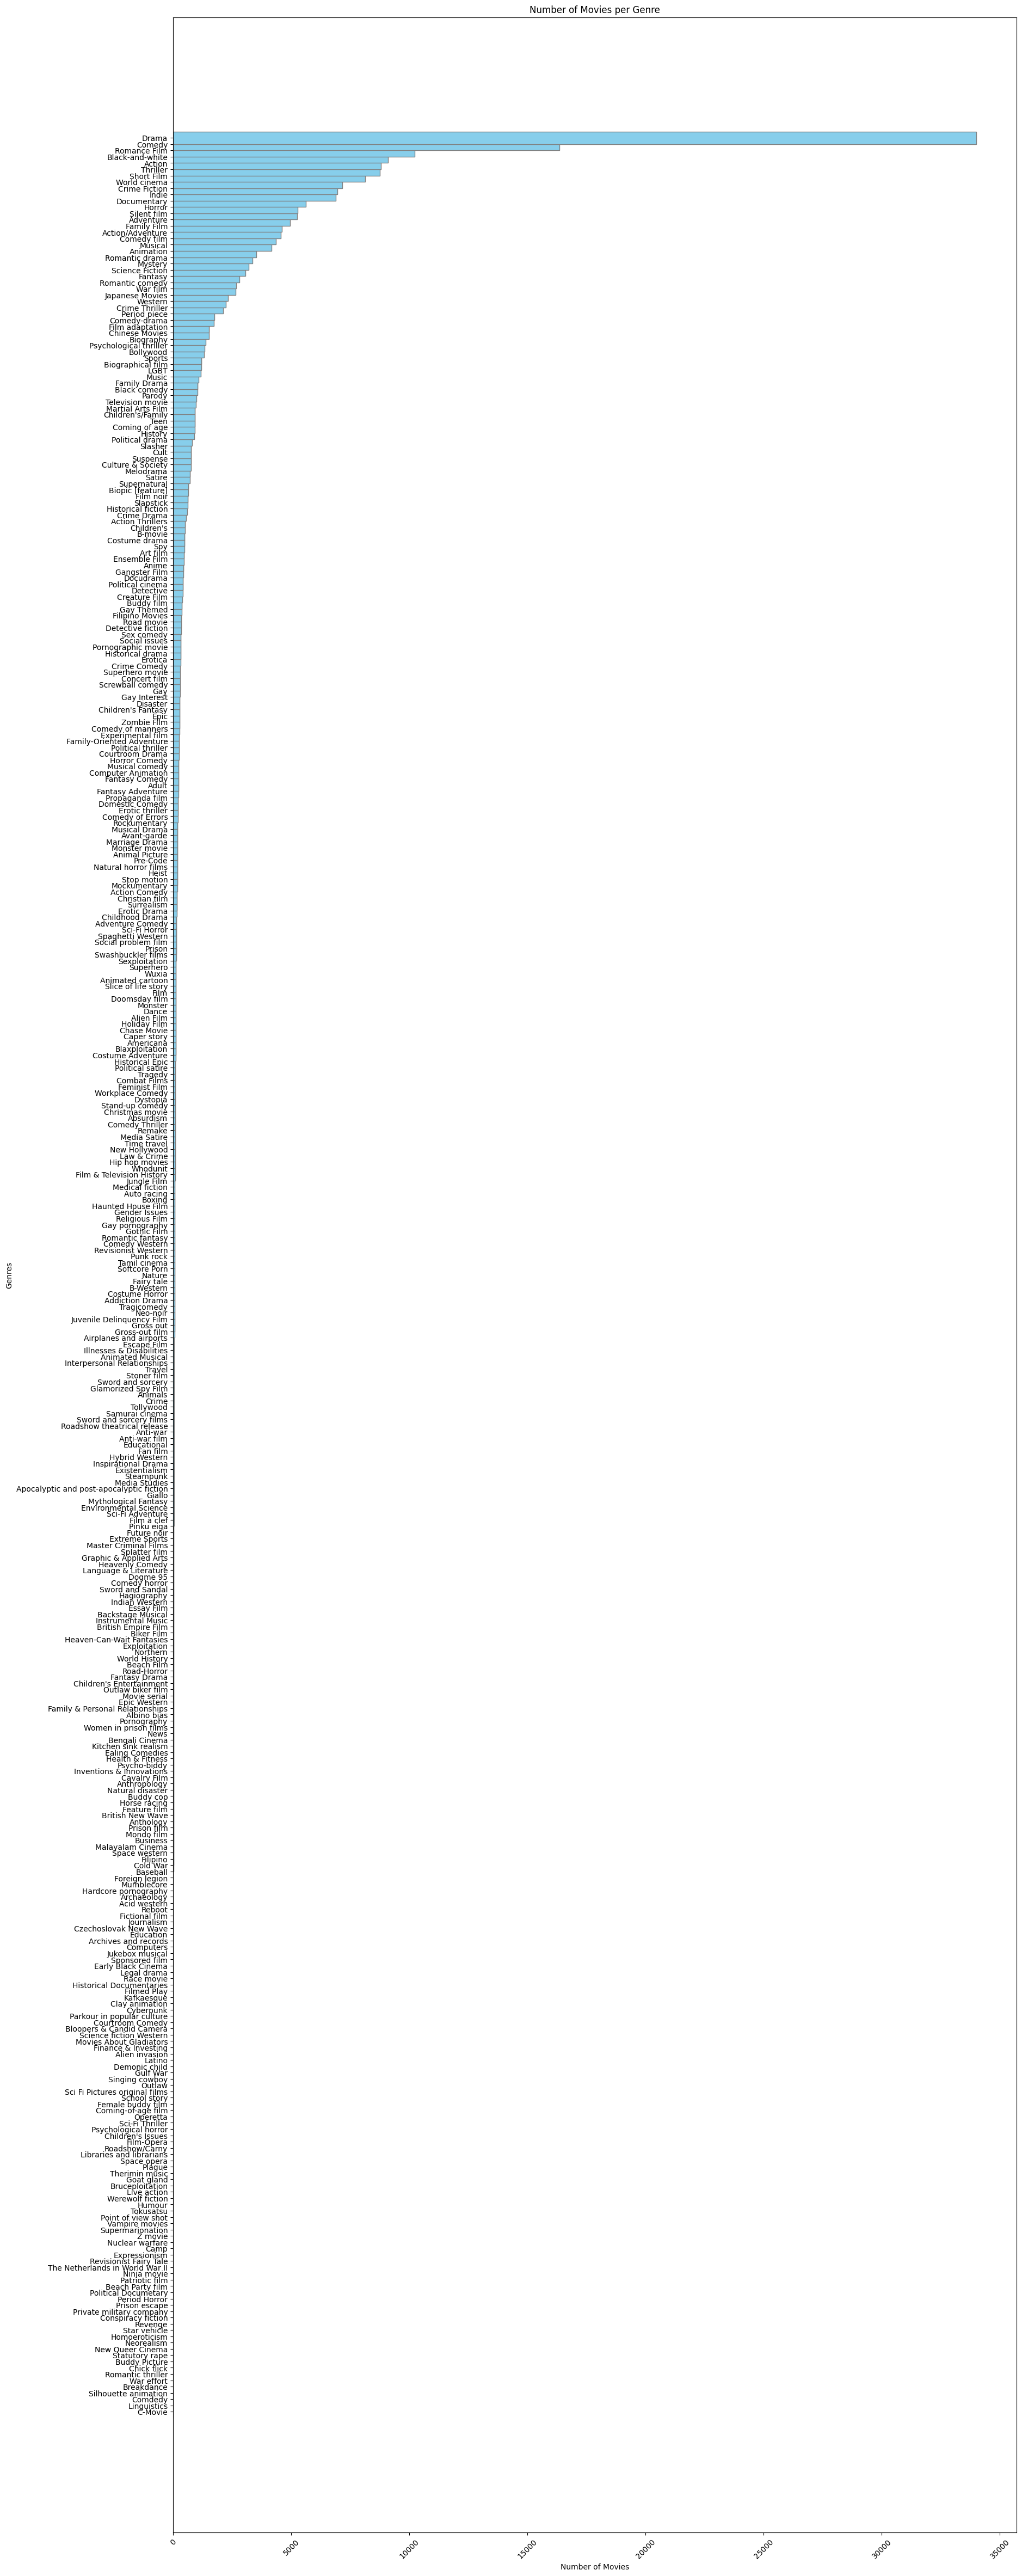

In [7]:
genres_names = list(movies.keys())
genres_counts = list(movies.values())


# Plot
plt.figure(figsize=(20, 60))
plt.barh(genres_names, genres_counts, color='skyblue',height=2, edgecolor='gray')

# Labels and title
plt.ylabel('Genres')
plt.xlabel('Number of Movies')
plt.title('Number of Movies per Genre')
plt.xticks(rotation=45)
plt.show()

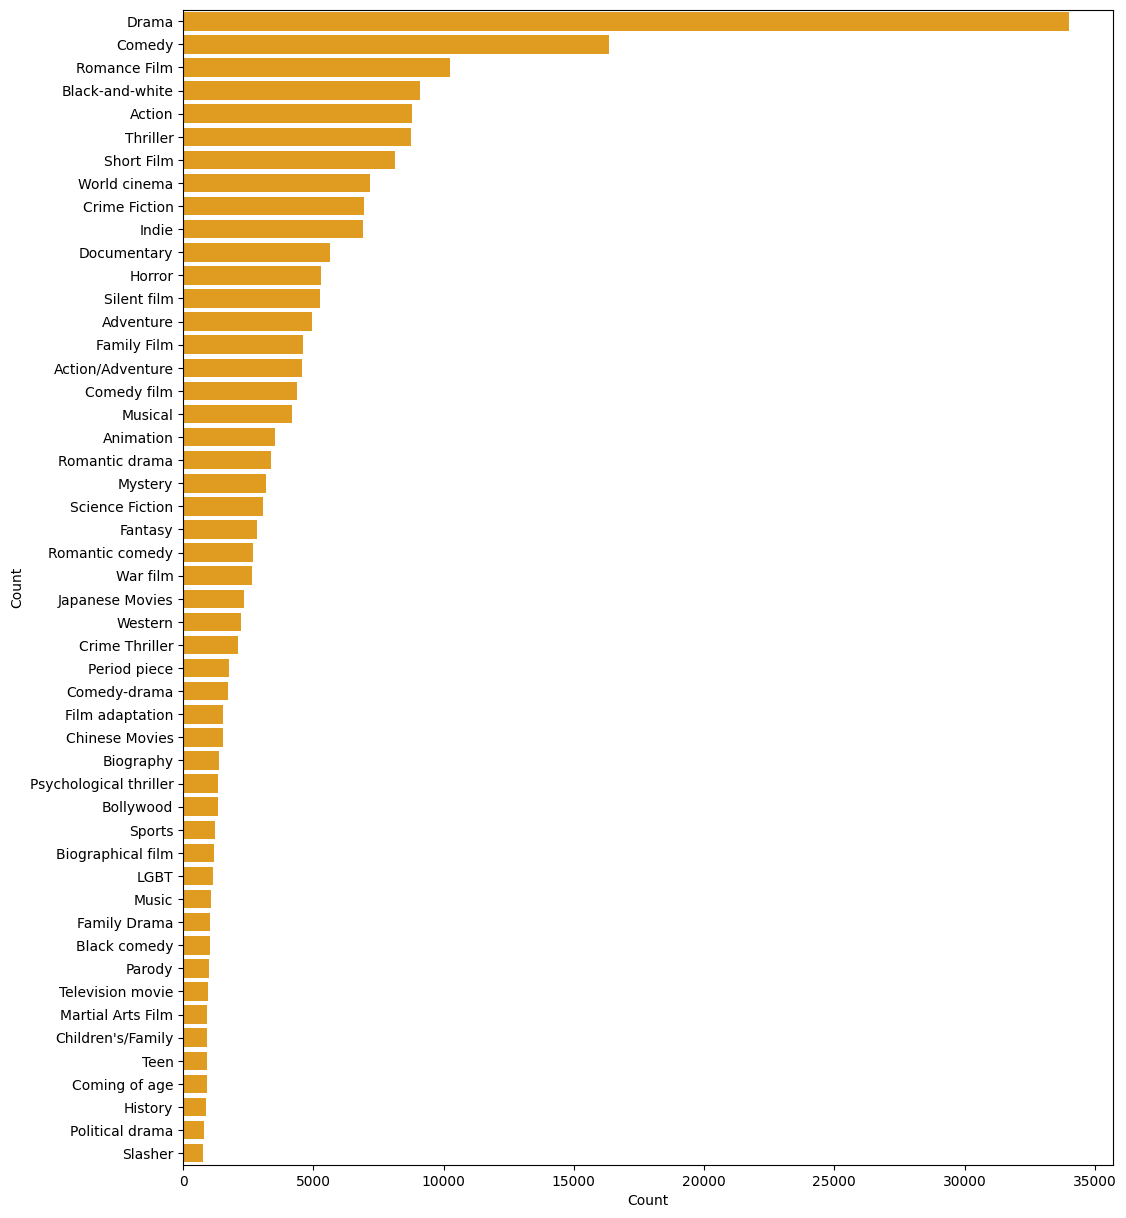

In [15]:
import pandas as pd
import seaborn as sns
all_genres_df = pd.DataFrame({'Genre': genres_names, 
                              'Count': genres_counts})
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre" , color= 'orange') 
ax.set(ylabel = 'Count') 
plt.show()

In [131]:
for key,val in movies.items():
    if val >= 3000:
        print (key)

Science Fiction
Mystery
Romantic drama
Animation
Musical
Comedy film
Action/Adventure
Family Film
Adventure
Silent film
Horror
Documentary
Indie
Crime Fiction
World cinema
Short Film
Thriller
Action
Black-and-white
Romance Film
Comedy
Drama


## Dataset creation

In [ ]:
movie_descriptions = []
dataset = {'desciption':[], 'labels':[]}

movie_genres = []
genres_ids = []

with open('./Dataset_MovieSummaries/movie.metadata.tsv') as f1:
    movie_genres_ = csv.reader(f1, delimiter='\t')

    # Extracting genres from the metadata
    for line in movie_genres_:
         
        genres = json.loads(line[8]).values()
        genres = list(genres)
        movie_genres.append(genres)
        id = json.loads(line[0])
        id = int(id)
        genres_ids.append(id)

# Creating a dict of movie ids as key and their genres and values.       
genres_and_ids = dict(zip(genres_ids, movie_genres))

with open('./Dataset_MovieSummaries/plot_summaries.txt') as f2:
    movie_description = csv.reader(f2, delimiter='\t')
    
    for line in movie_description:

        desciption = line[1]
        id = int(line[0])
        movie_descriptions.append(movie_descriptions)

        # Handling the movies that no genre methadata is available for them!
        if id in genres_and_ids:
            dataset['desciption'].append(desciption)
            dataset['labels'].append(genres_and_ids[id])
        

In [ ]:
len(movie_genres)

81741

In [ ]:
len(movie_descriptions)

42303

----> `For some movies no genre metadata is available .`

In [ ]:
dataset['desciption'][0]

"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."

In [ ]:
dataset['labels'][0]

['Drama', 'World cinema']

In [ ]:
len(dataset['desciption'])

42204

In [ ]:
len(dataset['labels'])

42204

In [ ]:
missing = len(movie_descriptions) - len(dataset['desciption'])
print(f'There was no genre metadata available for {missing} movies!!')

There was no genre metadata available for 99 movies!!
